# PyTorch Tutorial, Training a neural network:
#### We use loss function and optimizer to train a model
- Download the **MNIST** dataset and use DataLoader on them
- Define a **neural network** (model)
- Define loss function **MSE** for comparing the performance of the model 
- Define optimizer as **SGD** (Stochastic Gradient Descent), which is an optimization algorithm
- Train our model (the neural network) with **training set**
- Evaluate the model with **test set**

https://github.com/ostad-ai/PyTorch-Tutorial

In [63]:
# importing the necessary modules
import torch
import torch.nn as tnn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Lambda
from matplotlib import pyplot as plt

As we did before we download the MINST data set

In [64]:
training_set=datasets.MNIST(root='./MNIST',train=True, download=True, transform=ToTensor())
test_set=datasets.MNIST(root='./MNIST',train=False,download=True,transform=ToTensor())

Converting the class labels to one-hot vectors

In [65]:
one_hot_transform=Lambda(lambda y:torch.zeros(Nclasses,dtype=torch.float).index_put([torch.tensor(y)],
                                                                         values=torch.tensor(1.)))
training_set.target_transform=one_hot_transform
test_set.target_transform=one_hot_transform

Using **DataLoader** to make dataset iterable and in a form of batches

In [66]:
batchSize=16
train_dataloader=DataLoader(training_set,batch_size=batchSize,shuffle=True)
test_dataloader=DataLoader(test_set,batch_size=batchSize,shuffle=True)

In [67]:
device=torch.device('cuda' if torch.cuda.is_available()
         else 'mps' if torch.backends.mps.is_available()
         else 'cpu')
print(f'The device chosen is: {device}')

The device chosen is: cuda


Defining a model, which we introduced it in some previous post, set the device of model:

In [68]:
cin,cout,kernelSize,Nclasses=1,32,3,10
model=tnn.Sequential(
      tnn.Conv2d(cin,cout,kernel_size=kernelSize),
      tnn.ReLU(),
      tnn.MaxPool2d(kernel_size=2,stride=2),
      tnn.Flatten(),
      tnn.Linear(5408,Nclasses),
      tnn.Softmax(dim=1)
)
model=model.to(device)

Choose the loss function and optimizer:
 - Loss function is **Mean Squared Error** (MSE)
 - The optimzier is **Stochastic Gradient Descent** (SGD)

In [69]:
learningRate=.001 # this is the learning rate in the SGD algorithm
optimizer=torch.optim.SGD(model.parameters(),lr=learningRate)
lossFn=tnn.MSELoss().to(device)

We train the model with the training set.
<br>Each run over the whole training set is called an **epoch**. We train the model over several epochs.

In [70]:
Nepochs=17
loss_epochs=[]
model.train()
for i in range(Nepochs):
    losses=0.
    for x,y in train_dataloader:
        x,y=x.to(device),y.to(device)
        output=model(x)
        loss=lossFn(output,y)
        losses+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch{i}, loss:{losses}', end='; ')
    loss_epochs.append(losses)

Epoch0, loss:335.575509570539; Epoch1, loss:328.4970253407955; Epoch2, loss:320.0231431648135; Epoch3, loss:309.1276605427265; Epoch4, loss:294.767256423831; Epoch5, loss:276.2438206486404; Epoch6, loss:253.74232186377048; Epoch7, loss:228.81281803548336; Epoch8, loss:203.90042934380472; Epoch9, loss:181.17672333680093; Epoch10, loss:161.4360462296754; Epoch11, loss:144.61633023340255; Epoch12, loss:130.8293473208323; Epoch13, loss:119.68307584896684; Epoch14, loss:110.71886868029833; Epoch15, loss:103.48504076292738; Epoch16, loss:97.63002575421706; 

At this step, we  show the curve of training loss of each epoch as epoch advances:

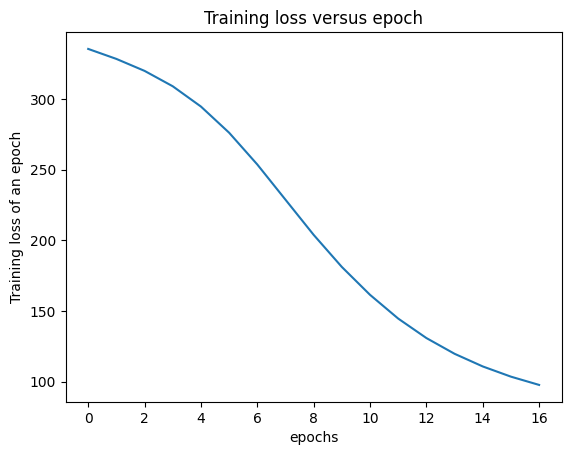

In [72]:
plt.plot(loss_epochs)
plt.title('Training loss versus epoch')
plt.xlabel('epochs')
plt.ylabel('Training loss of an epoch')
plt.show()

As we see above, during training phase, the loss value is reduced after each epoch.
<br>Let's evaluate the trained model with unseen dataset, called **test set**

In [73]:
model.eval()
test_loss=0.
accuracy=0.
#Nbatches=len(test_dataloader)
NtestSamples=len(test_dataloader.dataset)
with torch.no_grad():
    for x,y in test_dataloader:
        x,y=x.to(device),y.to(device)
        output=model(x)
        predicted=torch.argmax(output,axis=1)
        ydesired=torch.argmax(y,axis=1)
        accuracy+=(predicted==ydesired).type(torch.float).sum().item()
        loss=lossFn(output,y)
        test_loss+=loss.item()
print(f'Total test loss : {test_loss}')
print(f'Accuracy(%): {100*accuracy/NtestSamples}')

Total test loss : 15.109585538506508
Accuracy(%): 87.71


Now, we actually give a batch of test images to the model, and observe the predicted labels. 
<br>We compare the predicated labels with the true labels.

The accuracy of a test batch (%): 93.75


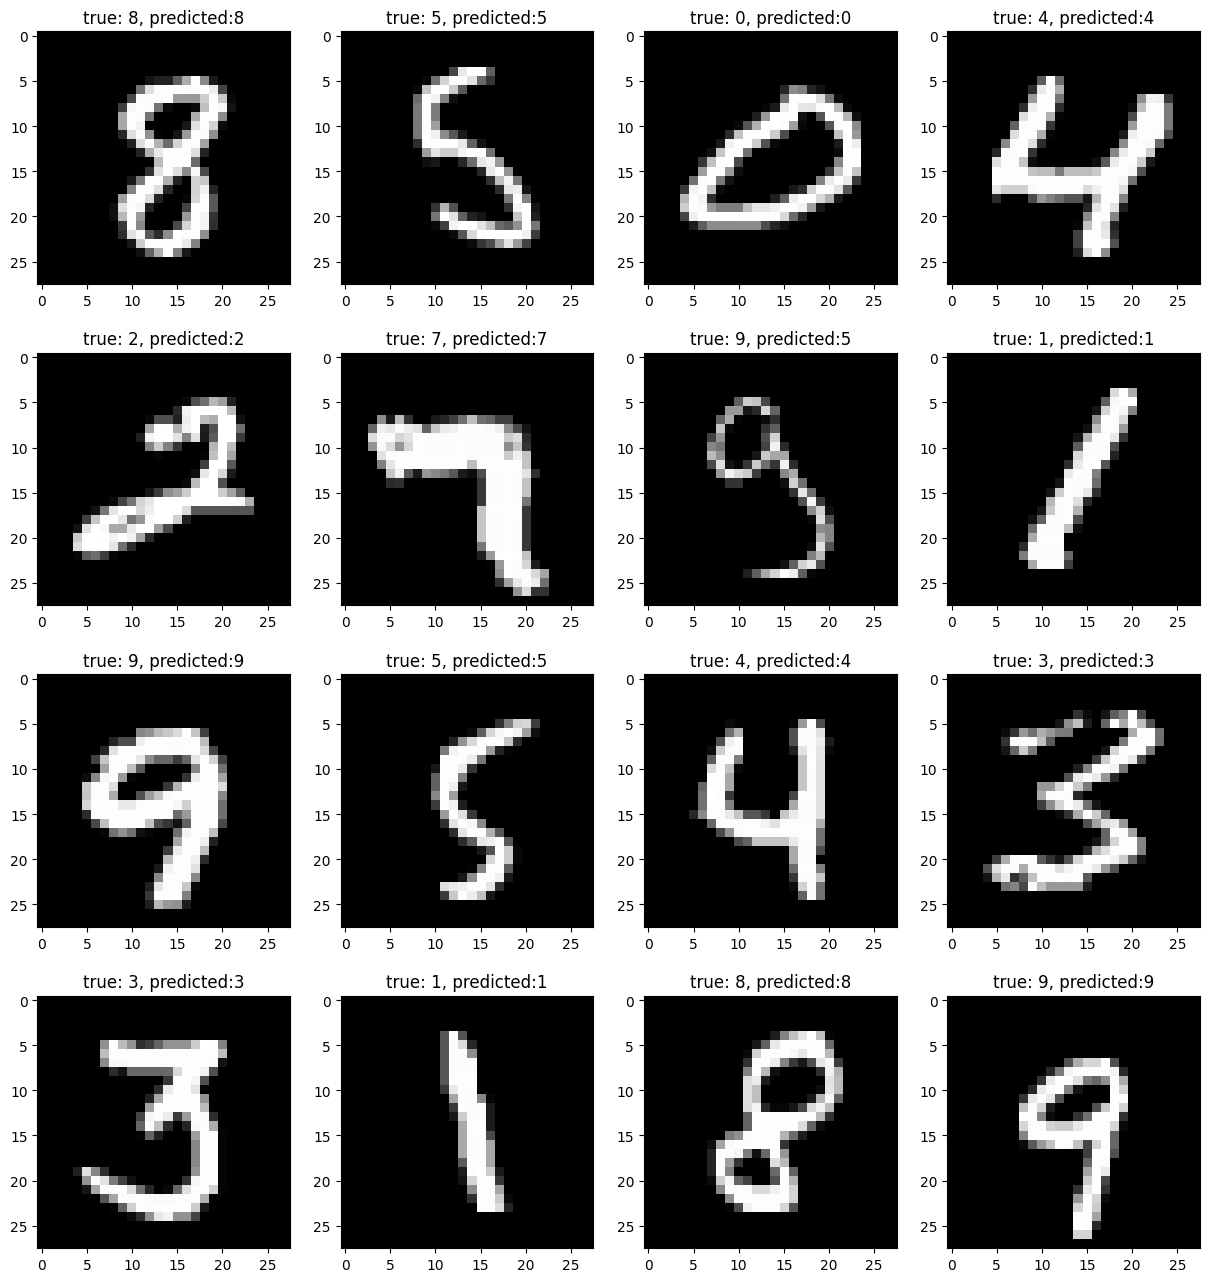

In [94]:
accuracy_batch=0.
model.eval()
with torch.no_grad():
    x,y=next(iter(test_dataloader))
    x,y=x.to(device),y.to(device)
    output=model(x)
    y=y.argmax(1)
    predicted=output.argmax(1)
    accuracy_batch+=(y==predicted).type(torch.float).sum().item()
    accuracy_batch/=batchSize
    print(f'The accuracy of a test batch (%): {100*accuracy_batch}')
    #plt.title(f'correct number is: {true_label.item()}, predicted number: {predicted_label}')
plt.figure(figsize=(15,16))
for i in range(batchSize):
    plt.subplot(4,4,i+1)
    plt.title(f'true: {y[i].item()}, predicted:{predicted[i].item()}')
    plt.imshow(x[i].cpu().numpy()[0],cmap='gray')
plt.show()